# Ejercicion de programación - Regresión Logistica

En este ejercicio se implementa regresion logistica y se aplica a dos diferentes datasets.

In [599]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [600]:
# se utiliza para el manejo de rutas y directorios.
import os

# Calculo cientifico y vectorial para python
import numpy as np

# Librerias para graficar
import pandas as pd
from matplotlib import pyplot

# Modulo de optimización de scipy
from scipy import optimize

# le dice a matplotlib que incruste gráficos en el cuaderno
%matplotlib inline



Tratamiento de la informacion mediante pandas definimos las columnas que nos sirve y la variable y, convirtiendo los valores de la variable "y" a binario donde si presenta plaga es cuando "y>0 " pero si no presenta plaga "y<=0"

In [601]:
#Cargar desde la carpeta
#data = np.genfromtxt('RICE.csv', delimiter=',')


#Cargar desde drive
data = pd.read_csv('/content/drive/Othercomputers/Mi portátil/6to Semetre Original/IA/labs/lab3/RICE.csv')

# Índices de las columnas que necesitas
columnas_indices_X = ['MaxT', 'MinT', 'RH1(%)', 'RF(mm)']  # Nombres de las columnas relevantes
indice_y = 'Pest Value'  # Nombre de la columna de 'Pest Value'

# Definir el porcentaje de datos para entrenamiento
porcentaje_entrenamiento = 0.8
cantidad_total_datos = len(data)

# Calcular cantidad de datos para entrenamiento y prueba
cantidad_entrenamiento = int(cantidad_total_datos * porcentaje_entrenamiento)
cantidad_prueba = cantidad_total_datos - cantidad_entrenamiento

# Obtener X e y completos
X = data[columnas_indices_X].values
y = data[indice_y].values

# Convertir 'Pest Value' a binario
y_binary = (y > 0).astype(int)

# Dividir el dataset
X_entrenamiento = X[:cantidad_entrenamiento]
Y_entrenamiento = y_binary[:cantidad_entrenamiento]

X_prueba = X[cantidad_entrenamiento:]
Y_prueba = y_binary[cantidad_entrenamiento:]

# Mostrar las dimensiones de los conjuntos de datos para verificar
print("Tamaño de X_entrenamiento:", X_entrenamiento.shape)
print("Tamaño de Y_entrenamiento:", Y_entrenamiento.shape)
print("Tamaño de X_prueba:", X_prueba.shape)
print("Tamaño de Y_prueba:", Y_prueba.shape)

Tamaño de X_entrenamiento: (15523, 4)
Tamaño de Y_entrenamiento: (15523,)
Tamaño de X_prueba: (3881, 4)
Tamaño de Y_prueba: (3881,)


Visualizar el

In [602]:
def plotData(X_entrenamiento, Y_entrenamiento):
    # Gragica los puntos de datos X y y en una nueva figura. Grafica los puntos de datos con * para los positivos y
    # o para los negativos.

    # Crea una nueva figura
    fig = pyplot.figure()

    # Find Indices of Positive and Negative Examples
    pos = y == 1
    neg = y == 0
    # Plot Examples
    pyplot.plot(X[pos, 0], X[pos, 1], 'k*', lw=2, ms=10)
    pyplot.plot(X[neg, 0], X[neg, 1], 'ko', mfc='y', ms=8, mec='k', mew=1)


Se llama a la función implementada para mostrar los datos cargados:

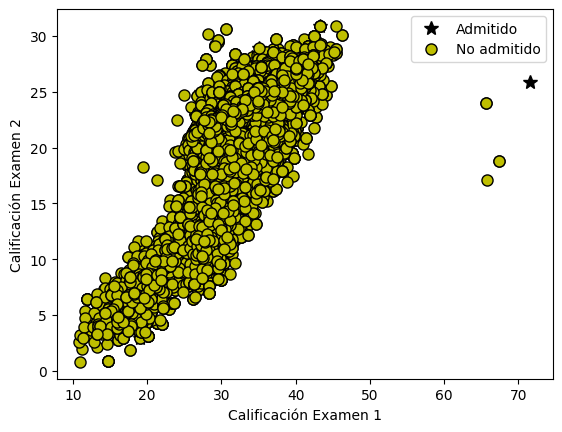

In [603]:
plotData(X_entrenamiento, Y_entrenamiento)
pyplot.xlabel('Calificación Examen 1')
pyplot.ylabel('Calificación Examen 2')
pyplot.legend(['Admitido', 'No admitido'])
pass

función sigmoide (también conocida como función logística) calcula la función sigmoide para la entrada z.La función sigmoide se define como: sigmoid(z) = 1 / (1 + exp(-z))Parámetros:z : escalar, array unidimensional o multidimensional de numpy El valor o array sobre el cual se calculará la función sigmoide.Retorna:Un escalar o array numpy de la misma forma que z, con la función sigmoide aplicada.

In [604]:

def sigmoid(z):
    """
    Calcula la función sigmoide para la entrada z.

    La función sigmoide se define como:
    sigmoid(z) = 1 / (1 + exp(-z))

    Parámetros:
    z : escalar, array unidimensional o multidimensional de numpy
        El valor o array sobre el cual se calculará la función sigmoide.

    Retorna:
    Un escalar o array numpy de la misma forma que z, con la función sigmoide aplicada.
    """
    # Utilizamos numpy.exp para calcular la exponencial de forma eficiente
    return 1 / (1 + np.exp(-z))


In [605]:
z = np.array([0, 0.5, 1])
g = sigmoid(z)
print('g(', z, ') = ', g)

g( [0.  0.5 1. ] ) =  [0.5        0.62245933 0.73105858]


Configurar la matriz adecuadamente, y agregar una columna de unos que corresponde al termino de intercepción. Agraga el termino de intercepción a X_entranamiento

In [606]:
# Configurar la matriz adecuadamente, y agregar una columna de unos que corresponde al termino de intercepción.
m, n = X_entrenamiento.shape
# Agraga el termino de intercepción a X_entranamiento
X_entrenamiento = np.concatenate([np.ones((m, 1)), X_entrenamiento], axis=1)

La funcion costo o función de pérdida en un modelo de regresión logística
La hipótesis h se calcula aplicando la función sigmoide a la multiplicación de la matriz de características X_entrenamiento y el vector de parámetros theta. La función sigmoide se utiliza para obtener probabilidades en la regresión logística.El costo J se calcula utilizando la fórmula de la función de pérdida de la regresión logística. Esta fórmula se basa en la entropía cruzada entre las predicciones h y las etiquetas reales Y_entrenamiento

In [607]:
def calcularCosto(theta, X_entrenamiento, Y_entrenamiento):
    m = len(Y_entrenamiento)  # Número de ejemplos de entrenamiento
    # Asegúrate de que theta tenga las dimensiones adecuadas
    if len(theta) != X_entrenamiento.shape[1]:
        raise ValueError(f"Dimensiones incorrectas: theta tiene {len(theta)} elementos, pero X_entrenamiento tiene {X_entrenamiento.shape[1]} características.")
    h = sigmoid(X_entrenamiento.dot(theta))
    J = (1 / m) * np.sum(-Y_entrenamiento.dot(np.log(h)) - (1 - Y_entrenamiento).dot(np.log(1 - h)))
    return J

In [608]:
print("Tamaño de X_entrenamiento:", X_entrenamiento.shape)

Tamaño de X_entrenamiento: (15523, 5)


implementa el algoritmo de descenso por el gradiente para optimizar los parámetros theta, donde m es el numero de ejemplos, luego en el for se repite las heces de interaciones, donde aplicando la función sigmoide a la multiplicación de X_entrenamiento por theta. Aquí theta.T es la transposición de theta, asegurando que las dimensiones Se calcula y almacena el costo actual en J_history usando la función calcularCosto

In [609]:
def descensoGradiente(theta, X_entrenamiento, Y_entrenamiento, alpha, num_iters):
    # Inicializa algunos valores
    m = Y_entrenamiento.shape[0] # numero de ejemplos de entrenamiento
    theta = theta.copy()
    J_history = []
    for i in range(num_iters):
        h = sigmoid(X_entrenamiento.dot(theta.T))
        theta = theta - (alpha / m) * (h - Y_entrenamiento).dot(X_entrenamiento)

        J_history.append(calcularCosto(theta, X_entrenamiento, Y_entrenamiento))
    return theta, J_history

In [610]:
print("Tamaño de X_entrenamiento:", X_entrenamiento.shape)

Tamaño de X_entrenamiento: (15523, 5)


Elegimos numero de iteraciones y porcentaje de aprendisaje, damos un tamaño de tetha con la canyidad de columnas de X_entramiento, llamamos a la funcion decensoGradiente, lo mostramos, damos el sesgo a X_Prueba luego se "Y_preb_prueba" realiza la predicción de las etiquetas para un conjunto de prueba en un modelo de regresión logística, luego se realiza el cálculo del porcentaje de aciertos del modelo en el conjunto de prueba y muestra el resultado en la consola

Tamaño de X_entrenamiento: (15523, 5)
Tamaño de Y_entrenamiento: (15523,)
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1
 1 1 1 1 1 1 1 0 0 0 0 0 0]
[-0.01342717 -0.14363202  0.17897708  0.01445485 -0.00624579]
[0.6991423186367214, 0.702864174656389, 0.7132369303558531, 0.7168443955871783, 0.732477653363354, 0.7328002986808951, 0.7531884129924218, 0.7466598462819901, 0.7701504582808176, 0.7557475349992704]
theta calculado por el descenso por el gradiente: [-0.01342717 -0.14363202  0.17897708  0.01445485 -0.00624579]
[0 0 0 0 0 0 1 1 1 1 1 0 0 0 0 1 1 1 1 1 1 1 1 0 0 0 1 0 1 1 0 0 1 1 1 1 0
 1 1 1 1 1 1 1 1 1 1 1 1 1]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 0 1 1 1 1]
Porcentaje de acierto del modelo en el conjunto de prueba: 54.50%


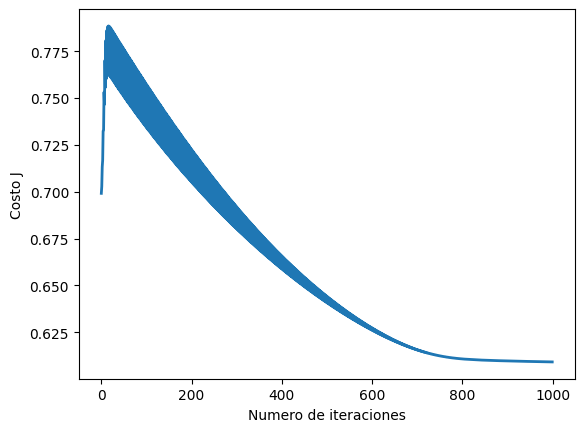

In [611]:
# Elegir algun valor para alpha (probar varias alternativas)
alpha = 0.001
num_iters = 10000
print("Tamaño de X_entrenamiento:", X_entrenamiento.shape)
print("Tamaño de Y_entrenamiento:", Y_entrenamiento.shape)
print(Y_entrenamiento[:50])
# inicializa theta y ejecuta el descenso por el gradiente
theta = np.zeros(X_entrenamiento.shape[1])


theta, J_history = descensoGradiente(theta, X_entrenamiento, Y_entrenamiento, alpha, num_iters)
print(theta[:10])
print(J_history[:10])
# Grafica la convergencia del costo
pyplot.plot(np.arange(len(J_history)), J_history, lw=2)
pyplot.xlabel('Numero de iteraciones')
pyplot.ylabel('Costo J')

# Muestra los resultados del descenso por el gradiente
print('theta calculado por el descenso por el gradiente: {:s}'.format(str(theta)))

# verificar si ingresa o no a la universidad
# Se debe cambiar esto
m, n = X_prueba.shape
# Agraga el termino de intercepción a A
X_prueba = np.concatenate([np.ones((m, 1)), X_prueba], axis=1)
Y_pred_prueba = (sigmoid(np.dot(X_prueba, theta)) >= 0.5).astype(int)
print(Y_prueba[:50])
print(Y_pred_prueba[:50])
# Calcular el porcentaje de acierto (precisión) del modelo en el conjunto de prueba
from sklearn.metrics import accuracy_score
porcentaje_acierto = accuracy_score(Y_prueba, Y_pred_prueba) * 100
print(f'Porcentaje de acierto del modelo en el conjunto de prueba: {porcentaje_acierto:.2f}%')

In [612]:
X_array = [1,29.8,11.6,83.6,0]
Y_entrenamiento = sigmoid(np.dot(X_array, theta))
print(Y_entrenamiento)
print('Un estudiante con nota examen 1: 36 y nota examen 2: 30 -> :{:.0f}'.format(Y_entrenamiento))

0.2671556846229365
Un estudiante con nota examen 1: 36 y nota examen 2: 30 -> :0


está diseñada para calcular tanto el costo como el gradiente en un modelo de regresión logística, m es numero de entranamiento, Cálculo de la Predicción (h), luego Evitar Valores Extremadamente Cercanos a 0 o 1, Cálculo del Costo (J), Cálculo del Gradiente (grad)

In [613]:
def costFunction(theta, X, y):
    """
    Calcula el costo y el gradiente para la regresión logística.

    Parámetros:
    theta : array numpy de tamaño (n+1,)
        Vector de parámetros para la regresión logística.
    X : array numpy de tamaño (m, n+1)
        Matriz de características (con el término de sesgo).
    y : array numpy de tamaño (m,)
        Vector de valores reales.

    Retorna:
    J : escalar
        El costo de usar theta como parámetro.
    grad : array numpy de tamaño (n+1,)
        Gradiente de los parámetros.
    """
    m = len(y)  # Número de ejemplos de entrenamiento
    h = sigmoid(np.dot(X, theta))  # Calcula h(theta)

    # Evita valores de 0 o 1 en h para prevenir log(0)
    epsilon = 1e-5
    h = np.clip(h, epsilon, 1 - epsilon)

    # Calcula el costo
    J = (1 / m) * np.sum(-y * np.log(h) - (1 - y) * np.log(1 - h))

    # Calcula el gradiente
    grad = (1 / m) * np.dot(X.T, (h - y))

    return J, grad

In [614]:
# Inicializacion de parametros de ajuste
initial_theta = np.zeros(X_prueba.shape[1])

print(initial_theta)
cost, grad = costFunction(initial_theta, X_prueba, Y_prueba)

print('Costo en theta inicial (zeros): {:.3f}'.format(cost))
print('Costo esperado (aproximado): 0.693\n')
print(grad)
print('Gradiente en theta inicial (zeros):')
print('\t[{:.4f}, {:.4f}, {:.4f}]'.format(*grad))
print('Gradiente esperado (aproximado):\n\t[-0.1000, -12.0092, -11.2628]\n')



[0. 0. 0. 0. 0.]
Costo en theta inicial (zeros): 0.693
Costo esperado (aproximado): 0.693

[-0.01558877 -0.5003092  -0.50707292 -1.73340634 -0.78403762]
Gradiente en theta inicial (zeros):
	[-0.0156, -0.5003, -0.5071]
Gradiente esperado (aproximado):
	[-0.1000, -12.0092, -11.2628]



define un diccionario de opciones para el algoritmo de optimización. En este caso, 'maxiter': 1000 establece el número máximo de iteraciones, optimize.minimize busca encontrar el valor óptimo de theta que minimiza la función de costo:

1.   costFunction: La función de costo que se quiere minimizar, que debe devolver tanto el costo como el gradiente.
2.   initial_theta: El punto de partida para el optimizador. Aquí, initial_theta es el valor inicial de los parámetros theta.
3. (X_prueba, Y_prueba): Los datos de entrenamiento que se pasan a la función de costo. La tupla contiene la matriz de características y el vector de etiquetas.
4. jac=True: Indica que la función de costo devuelve también el gradiente (derivadas) junto con el costo. Esto permite que el optimizador utilice el gradiente para mejorar la eficiencia.
5. method='TNC': El algoritmo de optimización a utilizar. 'TNC' es el algoritmo de Newton Truncated, que es un método de optimización que usa la información de segunda orden (aproximación de la matriz Hessiana) para encontrar el mínimo.
6. options=options: Las opciones para el optimizador, como el número máximo de iteraciones.

Obtener el Costo Optimizado<br>
Obtener los Parámetros Optimizados<br>
Imprimir los Resultados<br>

In [615]:
from scipy import optimize

In [616]:
# Establecer las opciones para optimize.minimize

# revisar la documentacion de scipy's optimize.minimize para mayor descripcion de los parametros
# La funcion devuekve un objeto `OptimizeResult`
# Se utiliza el algoritmo de Newton truncado para la optimización.
res = optimize.minimize(costFunction,
                        initial_theta,
                        (X_prueba, Y_prueba),
                        jac=True,
                        method='TNC')

# la propiedad fun del objeto devuelto por `OptimizeResult`
# contiene el valor del costFunction de un theta optimizado
cost = res.fun

# Theta optimizada esta en la propiedad x
theta = res.x

# Imprimir theta en la pantalla
print('Costo con un valor de theta encontrado por optimize.minimize: {:.3f}'.format(cost))
print('Costo esperado (aproximado): 0.203\n');

print('theta:')
print('\t[{:.3f}, {:.3f}, {:.3f}]'.format(*theta))
print('Theta esperado (aproximado):\n\t[-25.161, 0.206, 0.201]')

Costo con un valor de theta encontrado por optimize.minimize: 0.680
Costo esperado (aproximado): 0.203

theta:
	[-5.421, 0.055, 0.044]
Theta esperado (aproximado):
	[-25.161, 0.206, 0.201]


In [617]:
def plotDecisionBoundary(plotData, theta, X, y):
    """
    Grafica los puntos X y Y en una nueva figura con un limite de desicion definido por theta.
    the data points X and y into a new figure with the decision boundary defined by theta.
    Grafica los puntos con * para los ejemplos positivos y con o para los ejemplos negativos.

    Parametros:
    ----------
    plotData : func
        A function reference for plotting the X, y data.

    theta : array_like
        Parametros para la regresion logistica. Un vecto de la forma (n+1, ).

    X : array_like
        Data set de entrada. Se supone que X es una de las siguientes:
            1) Matriz Mx3, donde la primera columna es una columna de unos para intercepción.
            2) Matriz MxN, N> 3, donde la primera columna son todos unos.

    y : array_like
        Vector de datos de etiquetas de la forma (m, ).
    """
    # hacer que theta sera un arreglo numpy
    theta = np.array(theta)

    # Graficar los datos (recordar que la primera columna en X es la intercepción)
    plotData(X[:, 1:3], y)

    if X.shape[1] <= 3:
        # Solo se requieren 2 puntos para definir una linea, para lo cual se eligen dos puntos finales
        plot_x = np.array([np.min(X[:, 1]) - 2, np.max(X[:, 1]) + 2])

        # Calcular la línea límite de decisión
        plot_y = (-1. / theta[2]) * (theta[1] * plot_x + theta[0])

        print(plot_x)
        print(plot_y)
        # Graficar y ajustar los ejes para una mejor visualización
        pyplot.plot(plot_x, plot_y)

        # Leyenda, especifica para el ejercicio
        pyplot.legend(['Admitido', 'No admitido', 'Limite de decisión'])
        pyplot.xlim([30, 100])
        pyplot.ylim([30, 100])
    else:
        # Rango de la grilla
        u = np.linspace(-1, 1.5, 50)
        v = np.linspace(-1, 1.5, 50)

        z = np.zeros((u.size, v.size))
        # Evalua z = theta*x sobre la grilla
        for i, ui in enumerate(u):
            for j, vj in enumerate(v):
                z[i, j] = np.dot(mapFeature(ui, vj), theta)

        z = z.T  # importante transponer z antes de llamar al contorno
        # print(z)

        # Plot z = 0
        pyplot.contour(u, v, z, levels=[0], linewidths=2, colors='g')
        pyplot.contourf(u, v, z, levels=[np.min(z), 0, np.max(z)], cmap='Greens', alpha=0.4)


damos numero de ejemplos de entranamiento, creamos una varibale con la cantidad de columnas X.
1. Calcula la predicción lineal (logit) para cada ejemplo en X_prueba.
2. Aplica la función sigmoide a estos logits para obtener las probabilidades de pertenecer a la clase positiva.
3. Redondea las probabilidades a 0 o 1 para obtener las predicciones finales de clase.

In [618]:
def predict(theta, X_prueba):
    """
    Predecir si la etiqueta es 0 o 1 mediante regresión logística aprendida.
    Calcula las predicciones para X usando un umbral en 0.5 (es decir, si sigmoide (theta.T * x)> = 0.5, predice 1)

    Parametros
    ----------
    theta : array_like
        Parametros para regresion logistica. Un vecto de la forma (n+1, ).

    X : array_like
        Datos utilizados para el calculo de las predicciones.
        La fila es el numero de los puntos para calcular las predicciones,
        y las columnas con el numero de caracteristicas.

    Devuelve
    -------
    p : array_like
        Predicciones y 0 o 1 para cada fila en X.
    """
    m = X.shape[0] # Numero de ejemplo de entrenamiento

    p = np.zeros(m)

    p = np.round(sigmoid(X_prueba.dot(theta.T)))
    return p

Una vez entrenado el modelo se procede a realizar la prediccion y evaluación de los resultados de predecir cual es el valor que vota el modelo para todos los datos utilizados en el entrenamiento.

In [622]:
#  Predice la probabilidad de ingreso para un estudiante con nota de 45 en el examen 1 y nota de 85 en el examen 2
prob = sigmoid(np.dot([0,0,0,0,0], theta))
print(': {:.3f}%'.format(prob))
print('Valor esperado: 0.775 +/- 0.002\n')

# Compute accuracy on our training set
p = predict(theta, X_prueba)
print('Precisión de entrenamiento: {:.2f} %'.format(np.mean(p == Y_prueba) * 100))
print('Precisión esperada (aproximadamente): 89.00 %')

: 0.500%
Valor esperado: 0.775 +/- 0.002

Precisión de entrenamiento: 56.51 %
Precisión esperada (aproximadamente): 89.00 %
